## Test notebook - easy retrieval of postgres data via Jupyter widgets


In [1]:
# the following two lines indicate that external functions are auto-reloaded as soon as they change. 
%load_ext autoreload
%autoreload 2

In [41]:
# General stuff:
import sys
import argparse
import os
import json
import numpy as np
import math
import psycopg2
#import cPickle
import numpy as np
import pandas as pd
from datetime import date
from tqdm import tqdm_notebook

# Plotting:
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()
import matplotlib.cm as cm
import matplotlib as mpl
%matplotlib inline

# External functions from subfolder /database_helpers. 
# as soon as you change something in there and press save, it will auto reload on next execution.
from database_helpers.psql_start import *
from database_helpers.create_tables import *
from database_helpers.write2tables import *
from postgres_analysis_helpers.general import *
from postgres_analysis_helpers.get_data import *
from postgres_analysis_helpers.circstat_functions import *
# register pickle type to retrieve binary data from database
psycopg2.extensions.register_type(psycopg2.extensions.new_type(psycopg2.BINARY.values, 'BINARY-PICKLE', cast_pickle))

In [10]:
db_status = test_connect()
if db_status == False:
    print('Grrr... no database connection could be established.')
else:
    print('Yippiyeah! Database connection is established!')

Connecting to the PostgreSQL database...
Yippiyeah! Database connection is established!


### Query the database 

In [23]:
base_dataframe = pd.DataFrame() # create empty dataframe or feed in a base dataframe from before! *

In [24]:
psql = psql_neuroballs(base_dataframe)

78 animals across 5 experimenters found.
Total # of sessions: 8569 (unique clusters: 15264)


In [33]:
psql.retrieve_data()

VBox(children=(HBox(children=(SelectMultiple(layout=Layout(align_items='stretch', display='flex', flex_flow='row', height='150px', width='100px'), options=('ragnihiij', 'davidcr', 'horsto', 'torstsl', 'giuliaq'), value=()), SelectMultiple(layout=Layout(align_items='stretch', display='flex', flex_flow='row', height='150px', width='100px'), options=('07062', '54417', '54731', '55387', '55579', '55640', '55903', '55905', '55949', '56109', '56276', '56814', '56900', '57088', '57089', '57090', '57835', '57836', '57837', '57841', '58313', '58863', '58907', '59338', '59339', '59379', '59380', '59381', '59383', '59384', '59388', '59389', '59390', '59391', '59392', '59393', '59394', '59399', '70110', '70113', '70114', '70258', '70261', '70375', '70644', '70645', '71343', '71379', '71461', '71462', '71710', '72254', '72255', '72257', '72877', '72878', '73219', '73220', '73221', '73222', '73358', '73359', '73639', '74470', '74471', '74472', '74473', '74565', '74566', '74933', '74935', '74956', '7898', '7945', 'T4683', 'T4743', 'T4934', 'T4935'), value=()), SelectMultiple(layout=Layout(align_items='stretch', display='flex', flex_flow='row', height='150px', width='200px'), options={'LFP': 'lfp_tb', 'Tracking': 'tracking_tb', 'Spiketimes + Tracking': 'spiketimes_tracking_tb', 'Theta Phase Tuning': 'phase_tuning_tb', 'Interspike interval stats': 'ISI_tb', 'Spiketime autocorr': 'st_autocorr_tb', 'HD tuning stats': 'hd_tuning_tb', 'Ratemaps (KLUSTA)': 'ratemaps_tb', 'Spatial autocorr': 'autocorr_gs_tb', 'Waveforms': 'waveforms_tb', 'Stimulus stats': 'stimulus_tb', 'Stimulus mats': 'stimulus_mat_tb', 'BNT all (NEW!)': 'BNT_tb_screen', 'Waveform stats': 'waveforms_stats_tb'}, value=()), SelectMultiple(layout=Layout(align_items='stretch', display='flex', flex_flow='row', height='150px', width='240px'), options=('Select a table to the left',), value=()), Textarea(value="NOT LIKE '%las%'", layout=Layout(align_items='stretch', display='flex', flex_flow='column', height='150px'), placeholder='Type filter for session_name'))), HBox(children=(Button(description='Print selection', layout=Layout(align_items='stretch', display='flex', flex_flow='column', height='15%', width='10%'), style=ButtonStyle(), tooltip='Click here to show which entries you marked for retrieval'), Button(description='Get cursor', layout=Layout(align_items='stretch', display='flex', flex_flow='column', height='15%', width='10%'), style=ButtonStyle(), tooltip='Click here to get a cursor instead of a dataset'), Button(button_style='info', description='Get ze data!', layout=Layout(align_items='stretch', display='flex', flex_flow='column', height='15%', width='10%'), style=ButtonStyle(), tooltip='Click here to retrieve data from the database')))), layout=Layout(align_items='stretch', border='', display='flex', flex_flow='columns', height='200px', width='100%'))

Retrieving data ... (Empty dataframe) ...
1 entries retrieved.


### When you clicked on "Get ze data!" you need to then get the dataframe out ...

In [34]:
base_dataframe = psql.data()

In [35]:
base_dataframe.columns

Index(['n_drive_user', 'session_name', 'session_ts', 'animal_id',
       'lfp_session'],
      dtype='object')

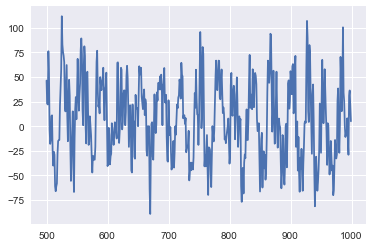

In [42]:
plt.plot(base_dataframe.iloc[0].lfp_session['eeg_mean'][500:1000]); plt.show()

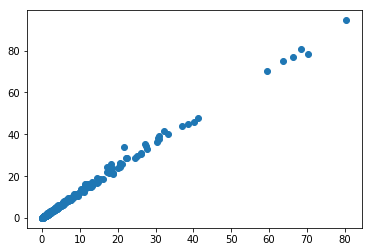

In [22]:
plt.scatter(base_dataframe.mean_rate_bnt,base_dataframe.mean_freq)
plt.show()

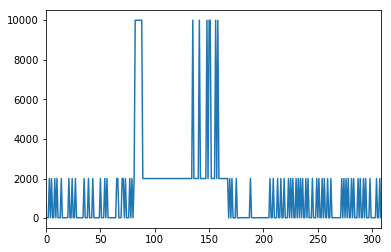

In [33]:
base_dataframe.stim_length.plot(kind='line')

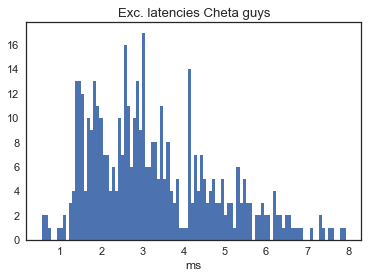

In [83]:
base_dataframe.dropna(axis=0,subset=['ex_latency_median'],inplace=True)
plt.hist(base_dataframe.ex_latency_median,100)
plt.title('Exc. latencies Cheta guys')
plt.xlabel('ms')
plt.show()

In [55]:
# it looks like this:
base_dataframe.tail()

,tetrode_no,animal_id,n_drive_user,session_ts,cluster_no,session_name,change_point_ms,counter_stimuli,stim_freq,stim_length,...,sample_rate_inp,ibi,salt_window,stats_p_inhib_40,ex_latency_var,ex_latency_mean,ex_latency_median,salt_p,sample_rate,inhibited
3268,8,74470,horsto,2017-09-26 08:39:29,19,26092017laser1(8mW)s1,NaN,277,10.101378,0.99639,...,16000.0,2096.355556,10.0,0.763375,2.501710,8.344551,9.270833,0.031579,48000.0,False
3273,8,74470,horsto,2017-09-26 08:39:29,23,26092017laser2(10mW)s1,NaN,276,10.101010,1.00000,...,16000.0,98.000000,10.0,0.484410,6.442118,5.304167,5.854167,0.000000,48000.0,False
3282,8,74470,horsto,2017-09-26 08:39:29,5,26092017laser3(20mW)s1,NaN,281,10.101010,1.00000,...,16000.0,98.000000,10.0,0.627267,8.410698,5.196970,6.666667,0.031579,48000.0,False
3308,8,74471,horsto,2017-09-26 10:13:46,12,26092017laser2(15mW)s1,NaN,282,10.101010,1.00000,...,16000.0,98.000000,10.0,0.448363,4.142140,3.397917,1.822917,0.021053,48000.0,False
3321,8,74471,horsto,2017-09-26 10:13:46,9,26092017laser3(12mW)s1,NaN,278,10.101010,1.00000,...,16000.0,98.000000,10.0,0.341711,4.758777,4.159722,3.708333,0.042105,48000.0,False


In [56]:
base_dataframe.sort_values(by="stats_p_inhib_20",ascending=True,inplace=True)

In [57]:
base_dataframe_exc= base_dataframe.copy()
base_dataframe_exc = base_dataframe_exc[base_dataframe_exc.inhibited == False]

In [58]:
base_dataframe_exc.head(10)

,tetrode_no,animal_id,n_drive_user,session_ts,cluster_no,session_name,change_point_ms,counter_stimuli,stim_freq,stim_length,...,sample_rate_inp,ibi,salt_window,stats_p_inhib_40,ex_latency_var,ex_latency_mean,ex_latency_median,salt_p,sample_rate,inhibited
2396,5,74935,horsto,2017-09-21 17:17:40,33,21092017laser2(70mW)s1,NaN,276,10.101378,0.996390,...,16000.0,2096.422222,10.0,9.137391e-04,5.053945,5.604569,6.187500,0.000000,48000.0,False
2397,5,74935,horsto,2017-09-21 17:17:40,33,21092017laser1(100mW)s1,NaN,276,10.101010,1.000000,...,16000.0,98.000000,10.0,5.500809e-11,3.986073,6.076003,6.145833,0.000000,48000.0,False
882,8,74471,horsto,2017-09-09 12:31:34,30,09092017laser2(10mW)s1,NaN,276,10.103229,1.978261,...,16000.0,2095.244444,10.0,1.502313e-04,2.386972,6.739005,6.333333,0.000000,48000.0,False
949,8,74471,horsto,2017-09-09 16:48:25,36,09092017s3_laser4(8mW),NaN,276,10.101378,0.996390,...,16000.0,2096.577778,10.0,1.711358e-03,3.286972,3.928305,3.020833,0.000000,48000.0,False
948,8,74471,horsto,2017-09-09 16:48:25,36,09092017s3_laser3(8mW),NaN,276,10.101010,2.000000,...,16000.0,2095.711111,10.0,5.576694e-04,3.011513,4.127757,3.041667,0.000000,48000.0,False
1200,5,74471,horsto,2017-09-12 18:32:33,34,12092017laser3(70mW)s1,NaN,278,10.101010,2.000000,...,16000.0,97.000000,10.0,5.087349e-07,1.425653,6.760417,6.666667,0.031579,48000.0,False
950,8,74471,horsto,2017-09-09 16:48:25,36,09092017s3_laser5(12mW),NaN,279,10.101010,1.000000,...,16000.0,98.000000,10.0,5.579266e-04,3.999844,4.165563,3.000000,0.000000,48000.0,False
1069,8,74471,horsto,2017-09-10 10:45:26,33,10092017laser1(10mW)s1,NaN,276,10.104695,0.963899,...,16000.0,2096.266667,10.0,8.274259e-03,2.318440,5.687114,5.500000,0.000000,48000.0,False
1070,8,74471,horsto,2017-09-10 10:45:26,33,10092017laser4(12mW)s1,NaN,278,10.101010,1.000000,...,16000.0,98.000000,10.0,1.122535e-03,2.598177,6.107083,5.583333,0.000000,48000.0,False
881,8,74471,horsto,2017-09-09 12:31:34,30,09092017laser1(10mW)s1,NaN,278,10.101010,1.000000,...,16000.0,98.000000,10.0,6.685238e-03,1.973509,6.372633,5.947917,0.000000,48000.0,False


In [59]:
base_dataframe_exc_fac = base_dataframe_exc[base_dataframe_exc.stats_p_inhib_20 < base_dataframe_exc.stats_p_inhib_10]

In [60]:
base_dataframe_exc_fac.head()

,tetrode_no,animal_id,n_drive_user,session_ts,cluster_no,session_name,change_point_ms,counter_stimuli,stim_freq,stim_length,...,sample_rate_inp,ibi,salt_window,stats_p_inhib_40,ex_latency_var,ex_latency_mean,ex_latency_median,salt_p,sample_rate,inhibited
2396,5,74935,horsto,2017-09-21 17:17:40,33,21092017laser2(70mW)s1,NaN,276,10.101378,0.99639,...,16000.0,2096.422222,10.0,9.137391e-04,5.053945,5.604569,6.187500,0.000000,48000.0,False
2397,5,74935,horsto,2017-09-21 17:17:40,33,21092017laser1(100mW)s1,NaN,276,10.101010,1.00000,...,16000.0,98.000000,10.0,5.500809e-11,3.986073,6.076003,6.145833,0.000000,48000.0,False
949,8,74471,horsto,2017-09-09 16:48:25,36,09092017s3_laser4(8mW),NaN,276,10.101378,0.99639,...,16000.0,2096.577778,10.0,1.711358e-03,3.286972,3.928305,3.020833,0.000000,48000.0,False
948,8,74471,horsto,2017-09-09 16:48:25,36,09092017s3_laser3(8mW),NaN,276,10.101010,2.00000,...,16000.0,2095.711111,10.0,5.576694e-04,3.011513,4.127757,3.041667,0.000000,48000.0,False
1200,5,74471,horsto,2017-09-12 18:32:33,34,12092017laser3(70mW)s1,NaN,278,10.101010,2.00000,...,16000.0,97.000000,10.0,5.087349e-07,1.425653,6.760417,6.666667,0.031579,48000.0,False


In [62]:
base_dataframe_exc_fac = base_dataframe_exc_fac.iloc[:50]

In [63]:
psql = psql_neuroballs(base_dataframe_exc_fac)
psql.retrieve_data()

75 animals across 5 experimenters found!
Total # of 7858 sessions (unique clusters: 14196)
Length of input dataframe: 50


Retrieving data ... Dataframe not empty


Success. NaNs: 0



In [64]:
base_dataframe_exc_fac = psql.data()


Generating plot...


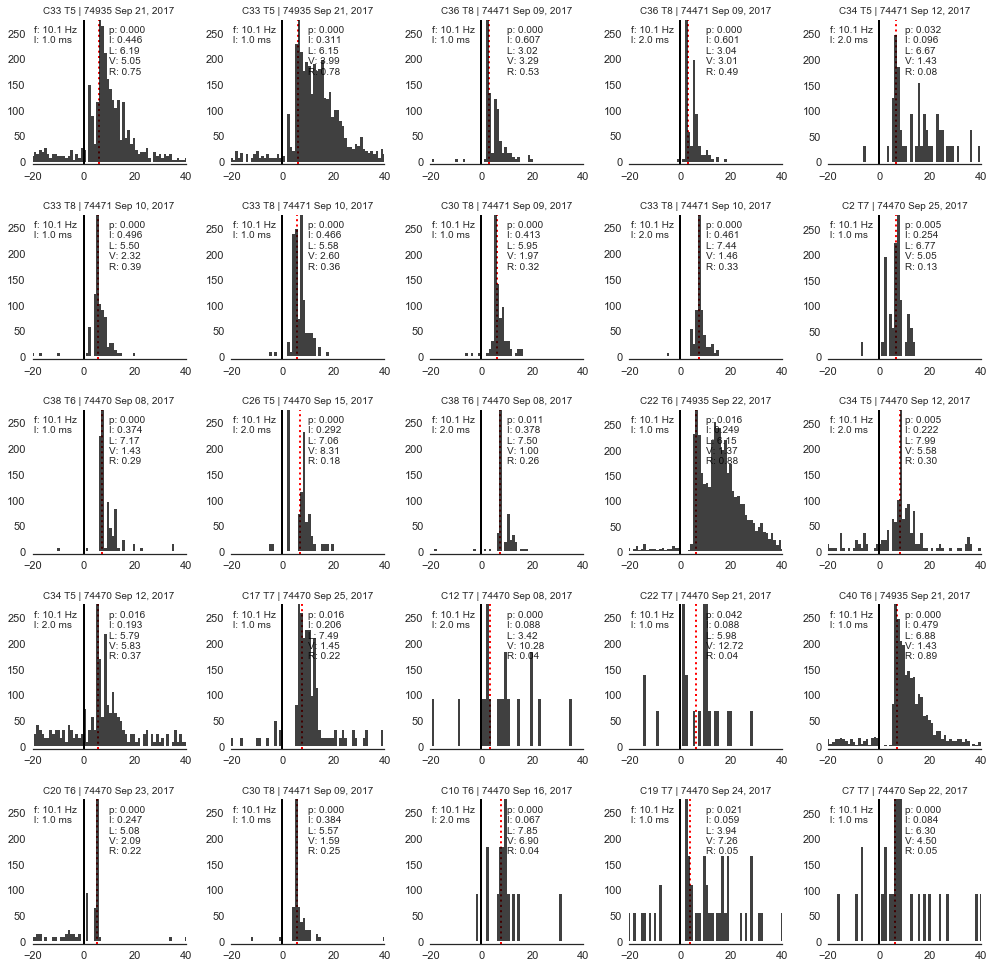

In [65]:
create_spike_plots_stimulus(base_dataframe_exc_fac,25,0,False)

In [55]:
np.mean(sorted.phase_stats_mvl)

0.1774933027977636

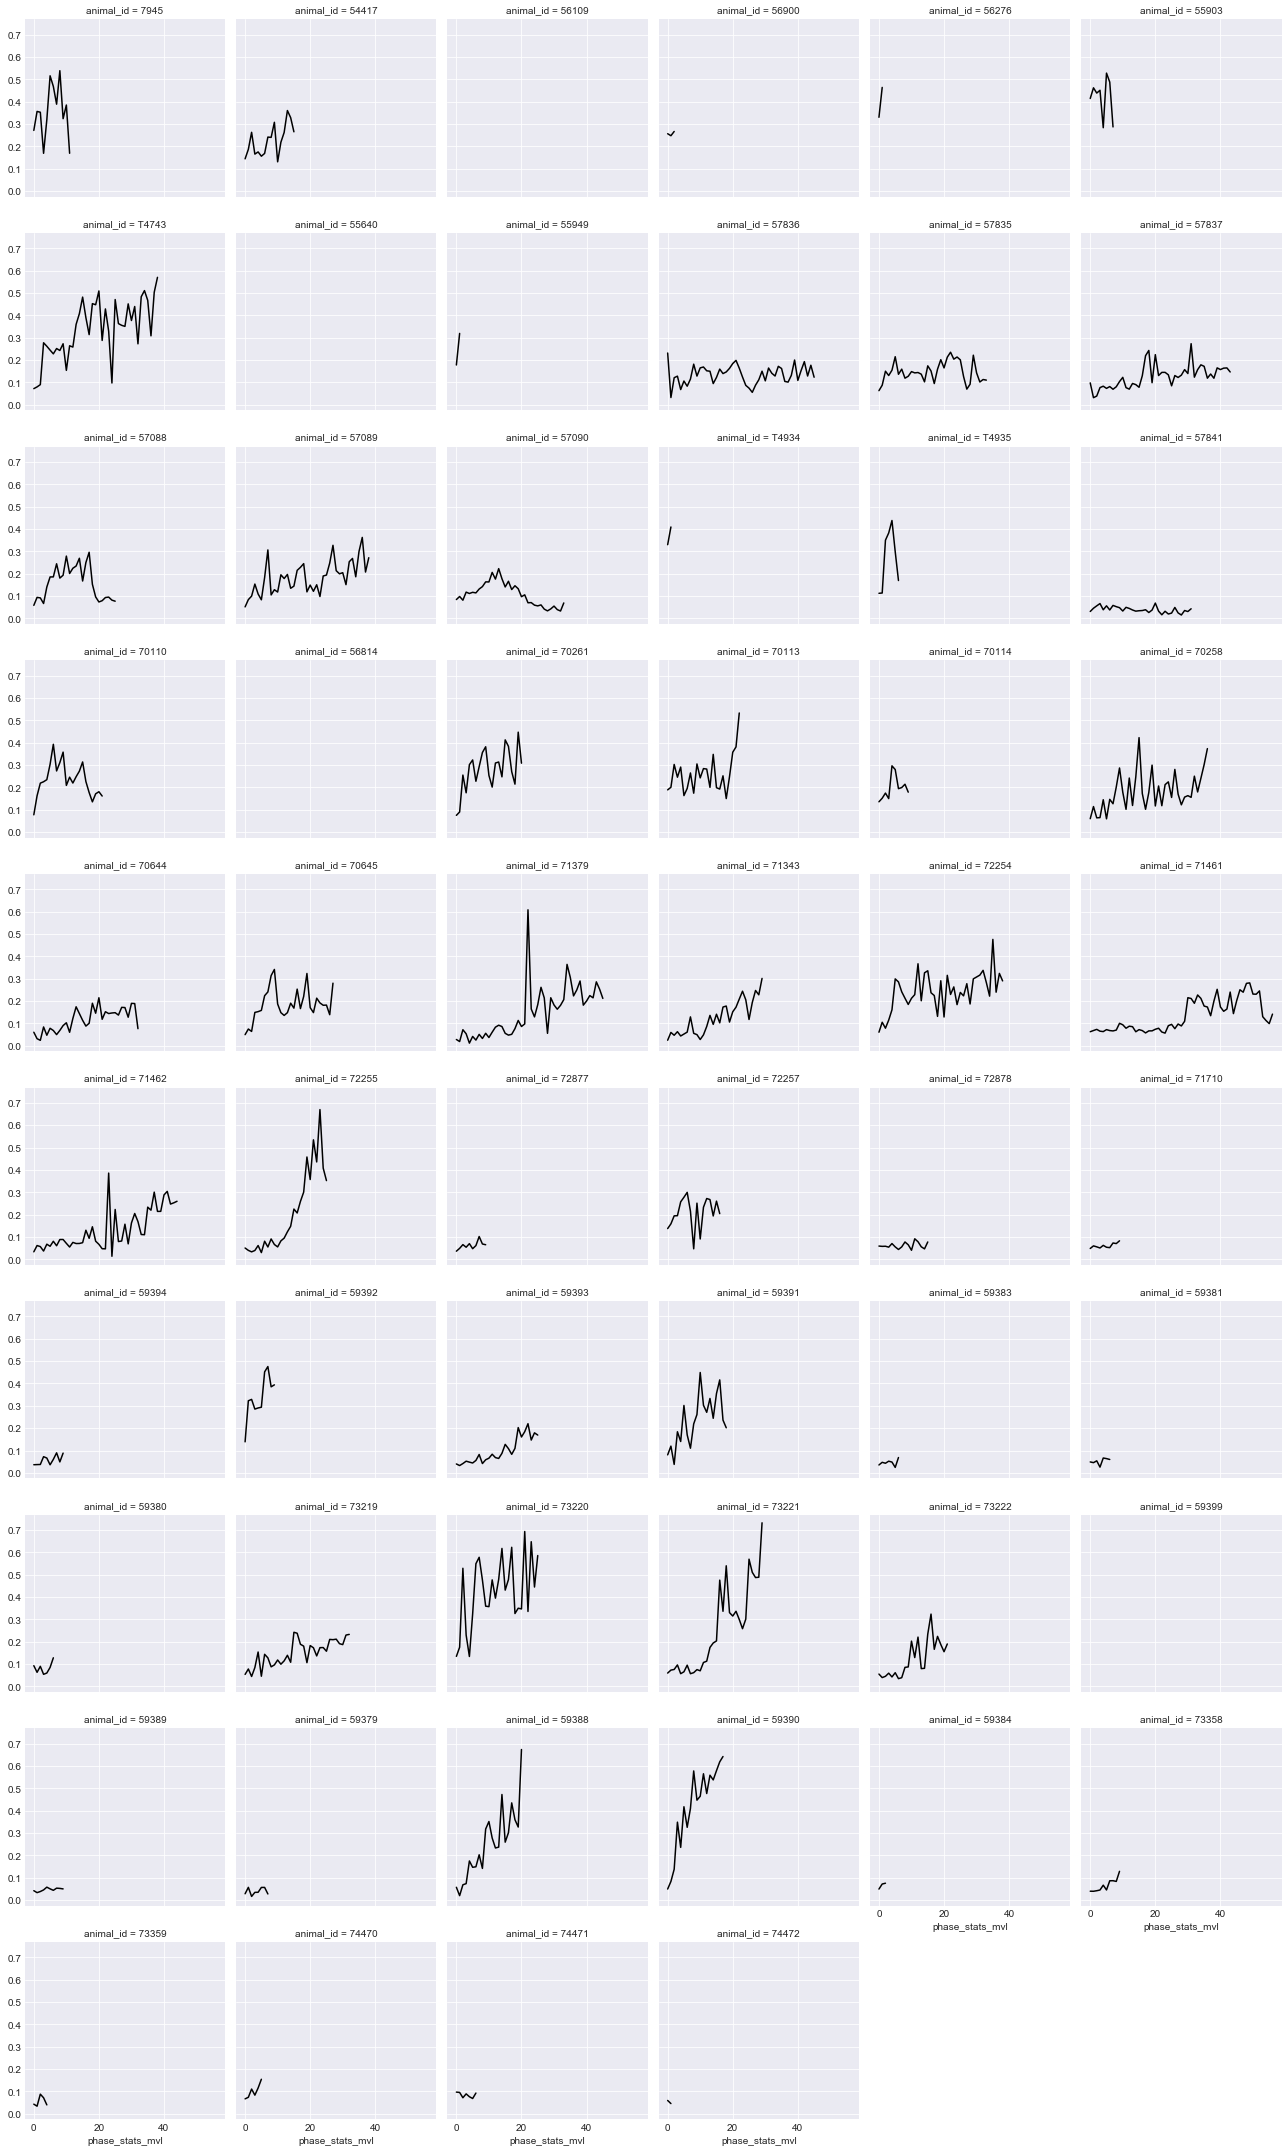

In [56]:
sns.set_style('darkgrid')
g = sns.FacetGrid(sorted, col="animal_id",col_wrap=6)
g.map(plt.plot, "phase_stats_mvl",color='k');

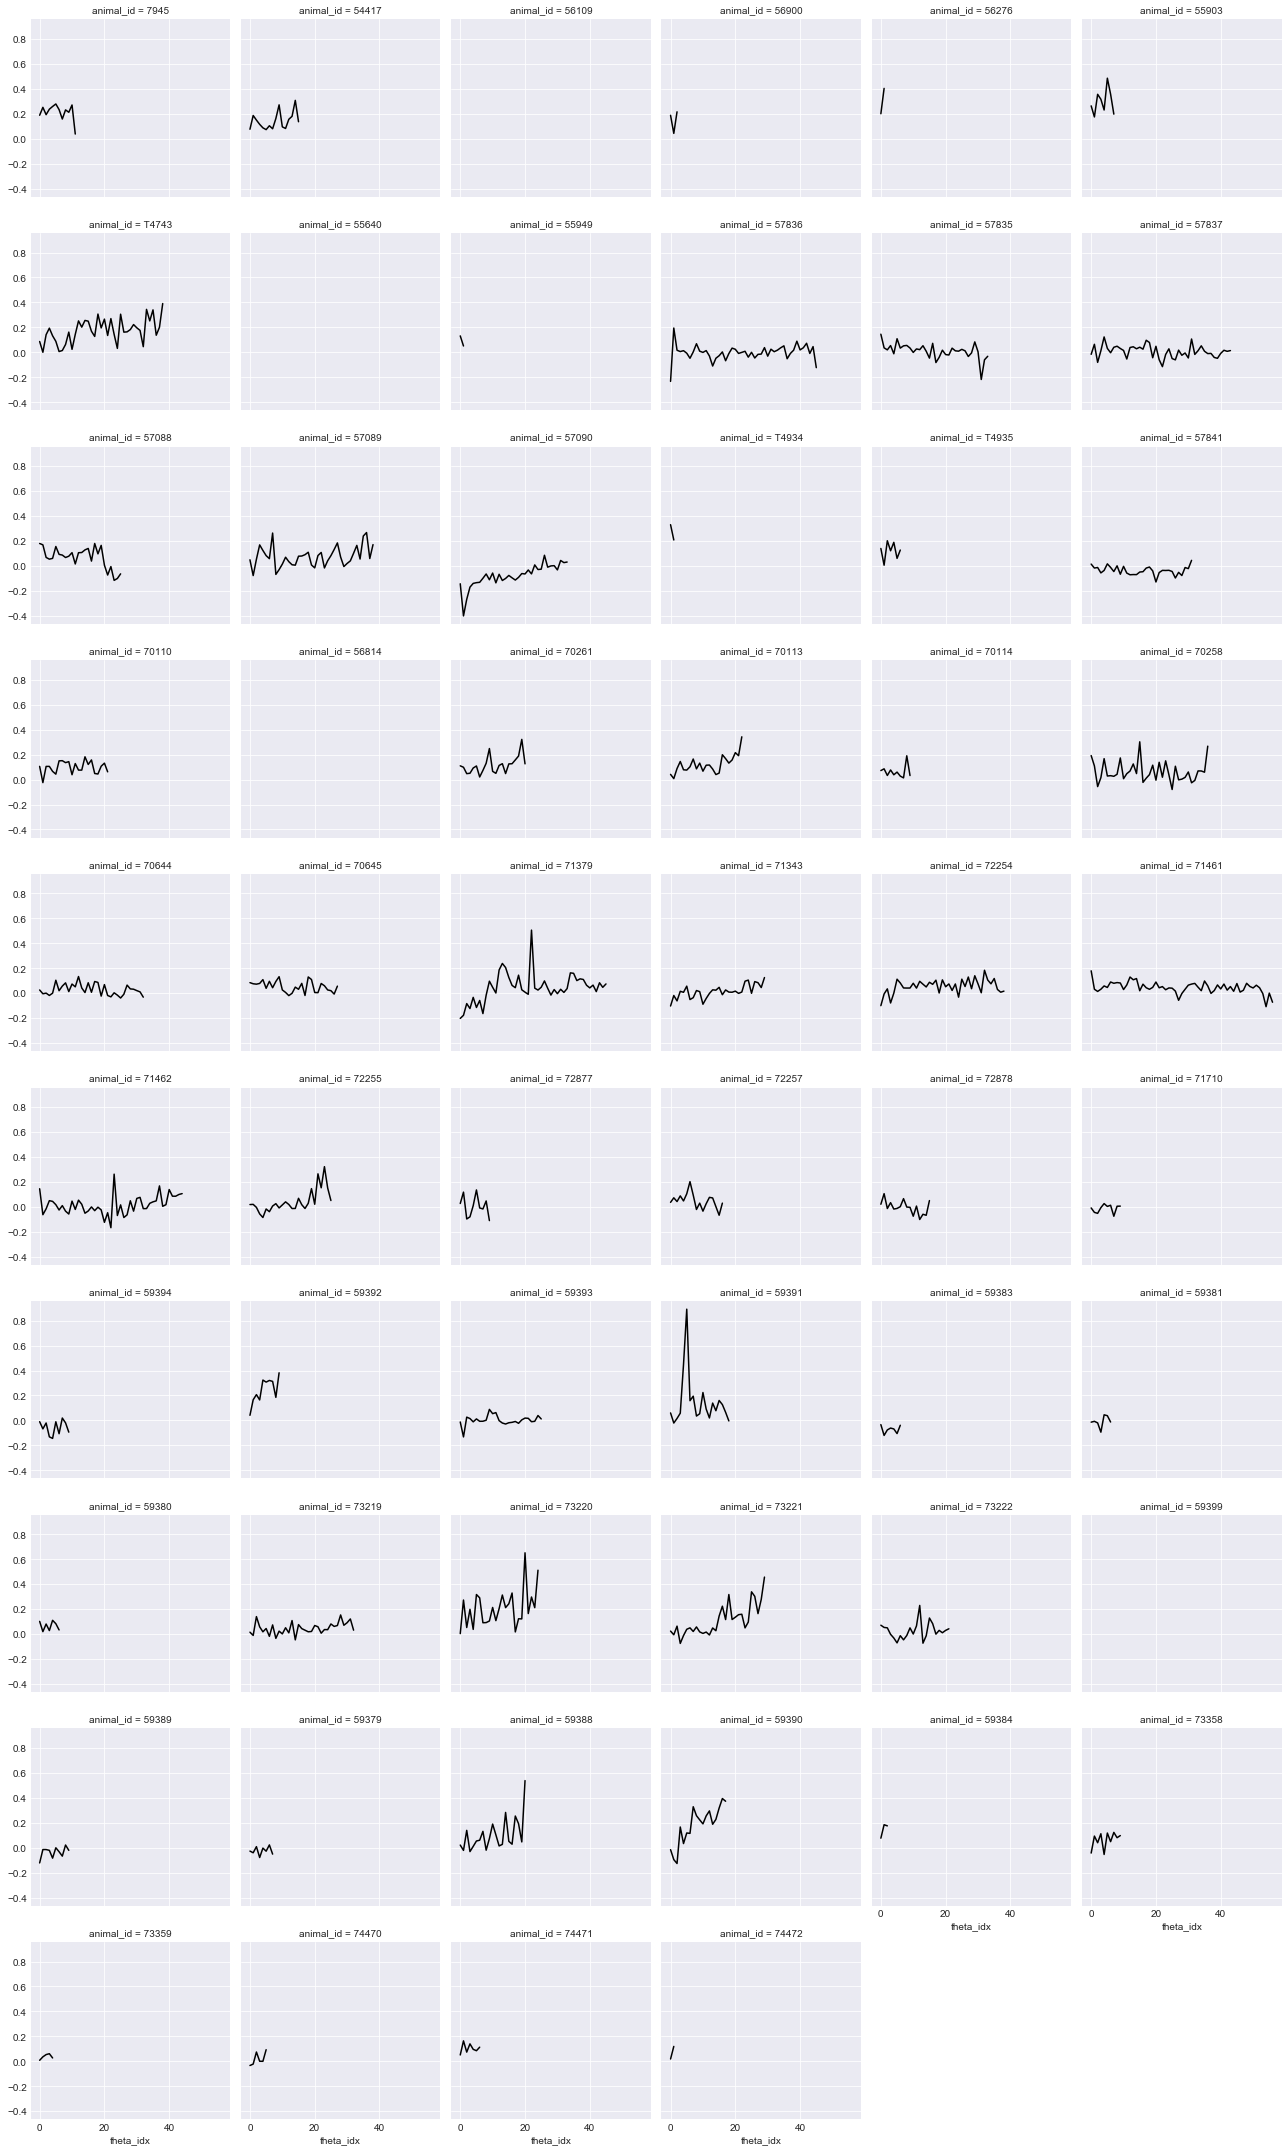

In [57]:
g = sns.FacetGrid(sorted, col="animal_id",col_wrap=6)
g.map(plt.plot, "theta_idx",color='k');

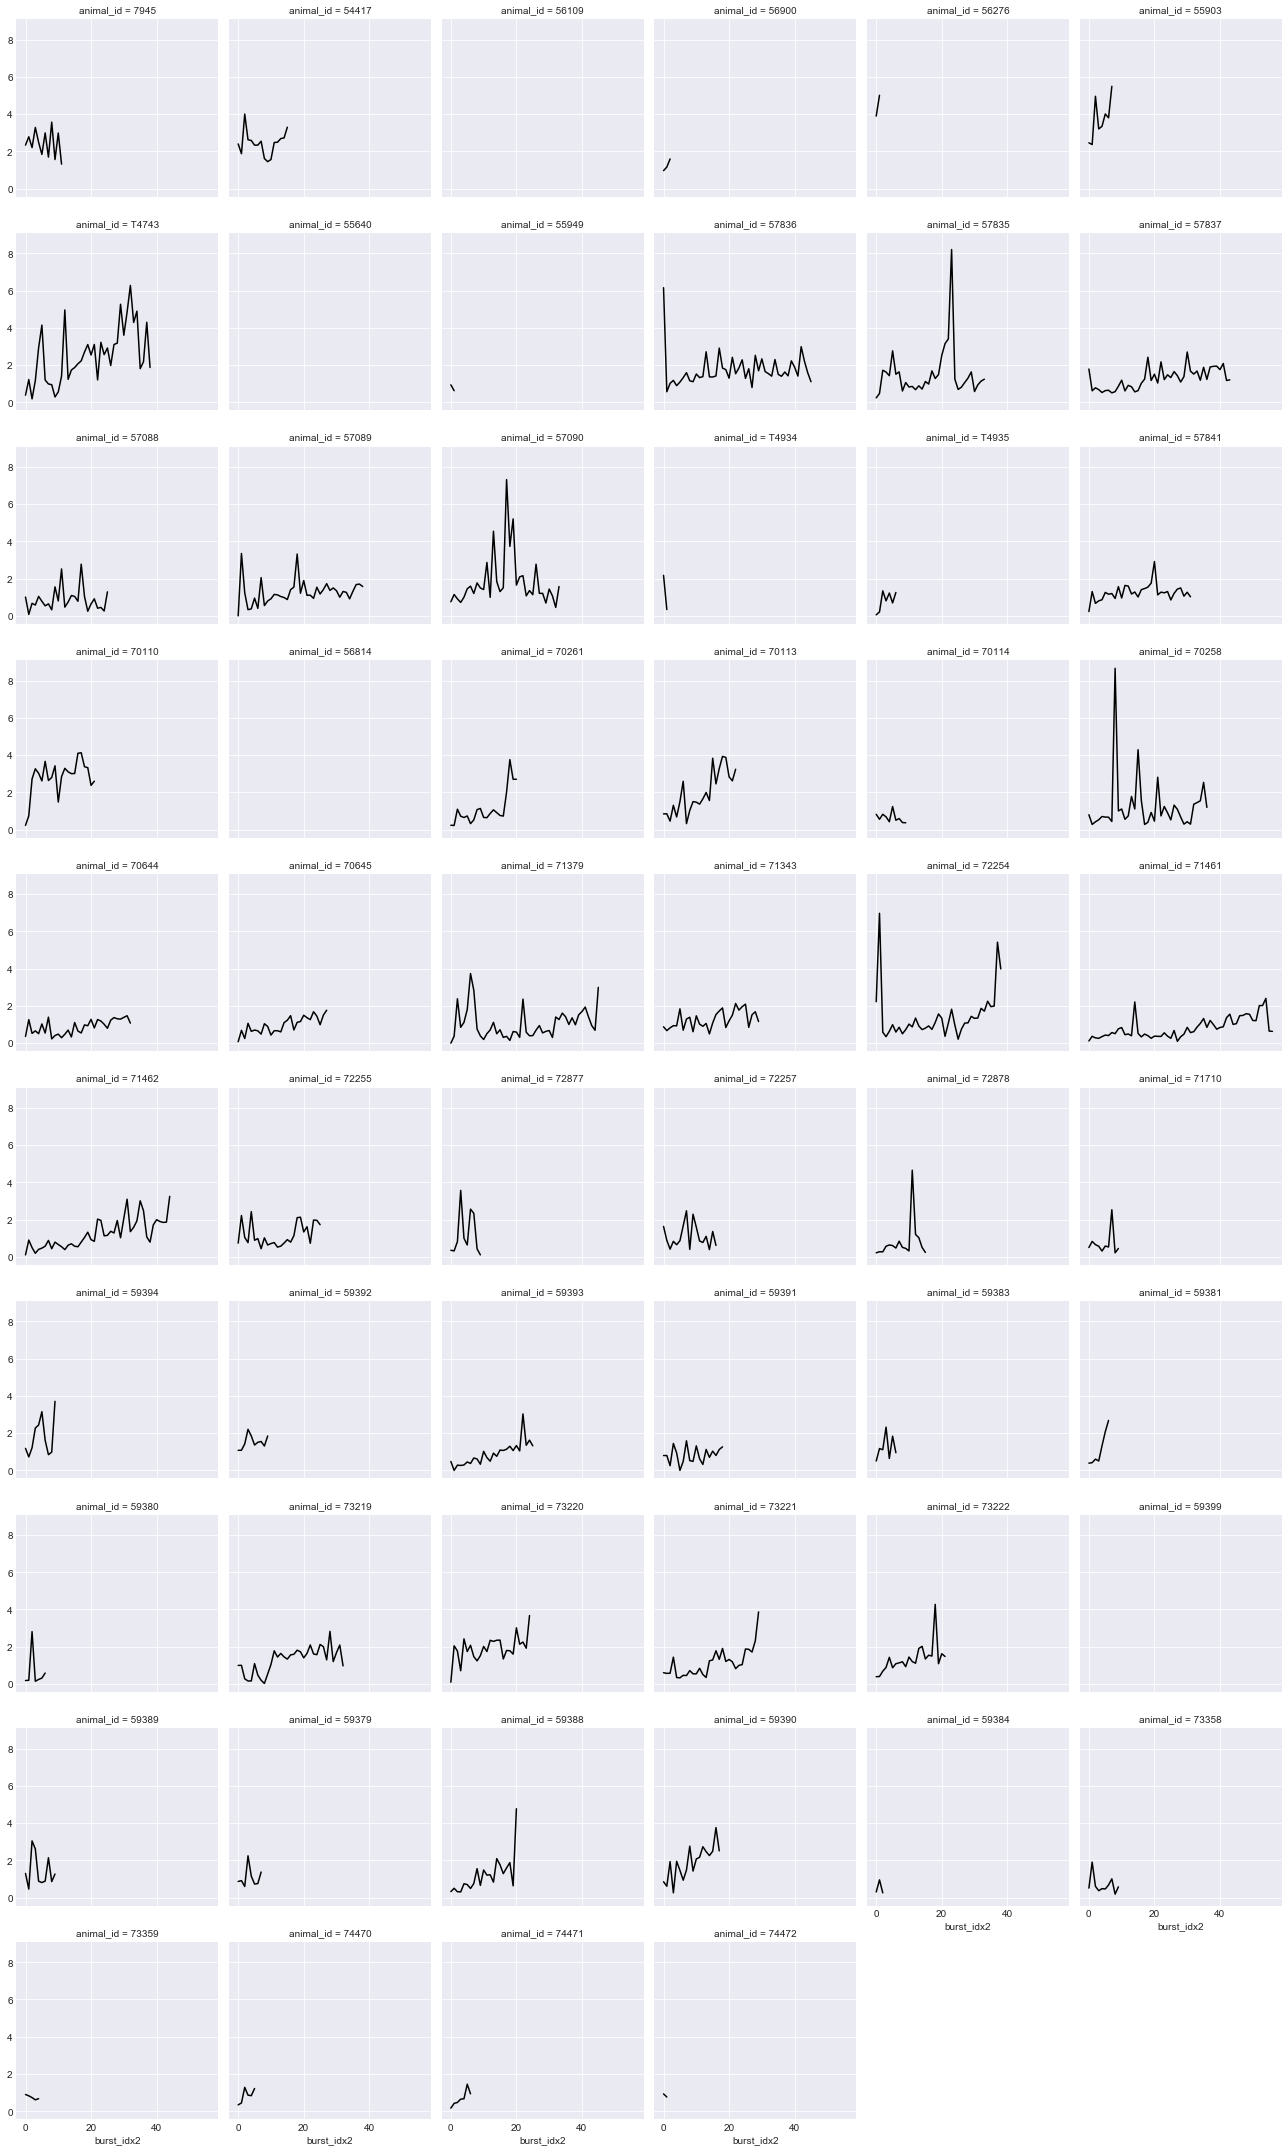

In [40]:
g = sns.FacetGrid(sorted, col="animal_id",col_wrap=6)
g.map(plt.plot, "burst_idx2",color='k')

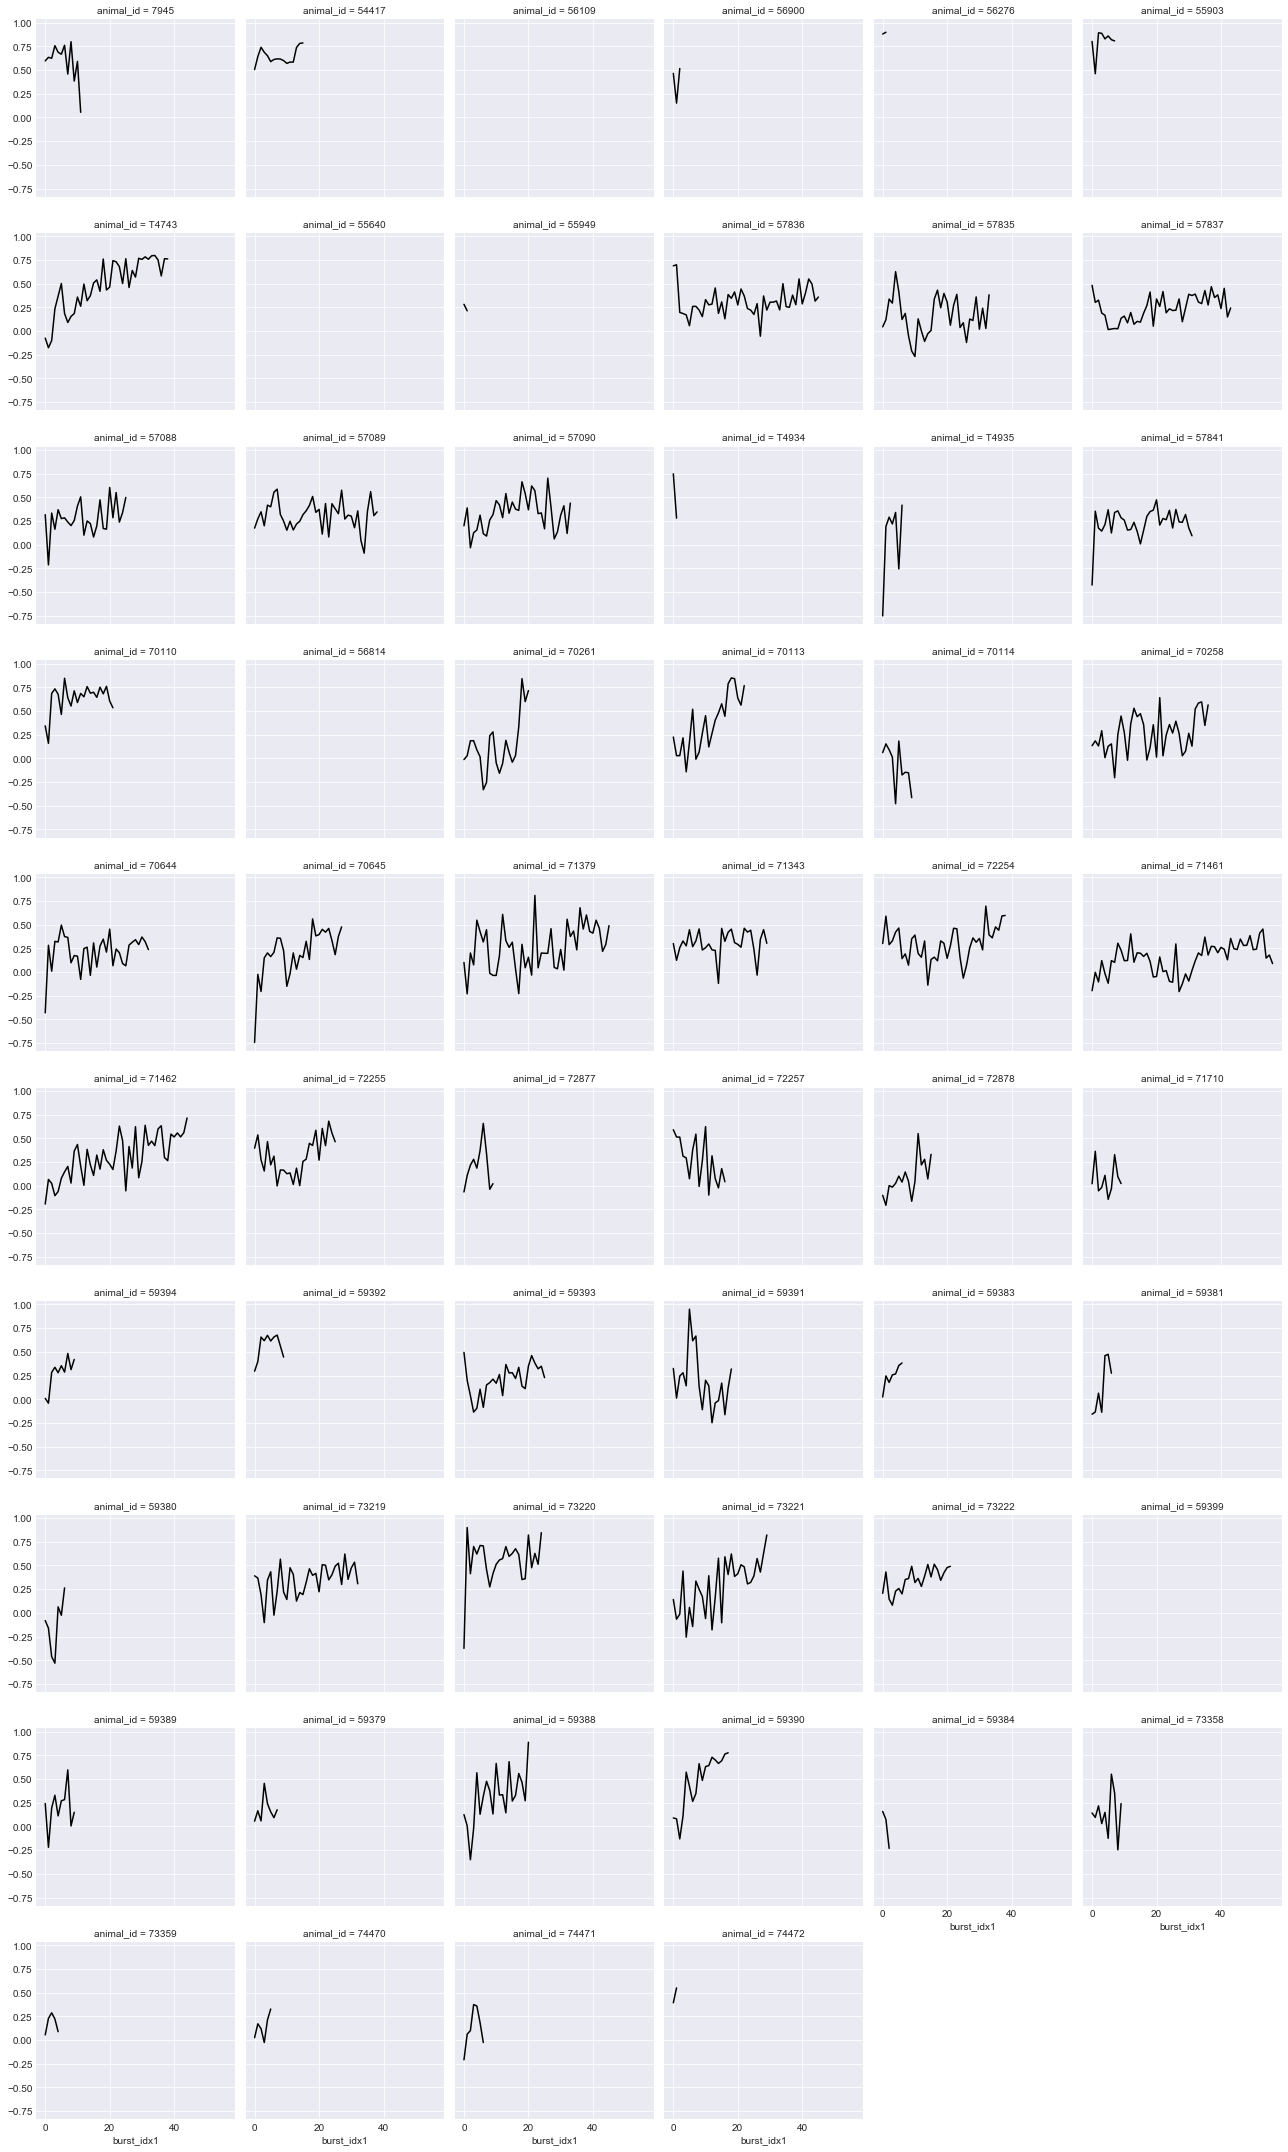

In [41]:
g = sns.FacetGrid(sorted, col="animal_id",col_wrap=6)
g.map(plt.plot, "burst_idx1",color='k')

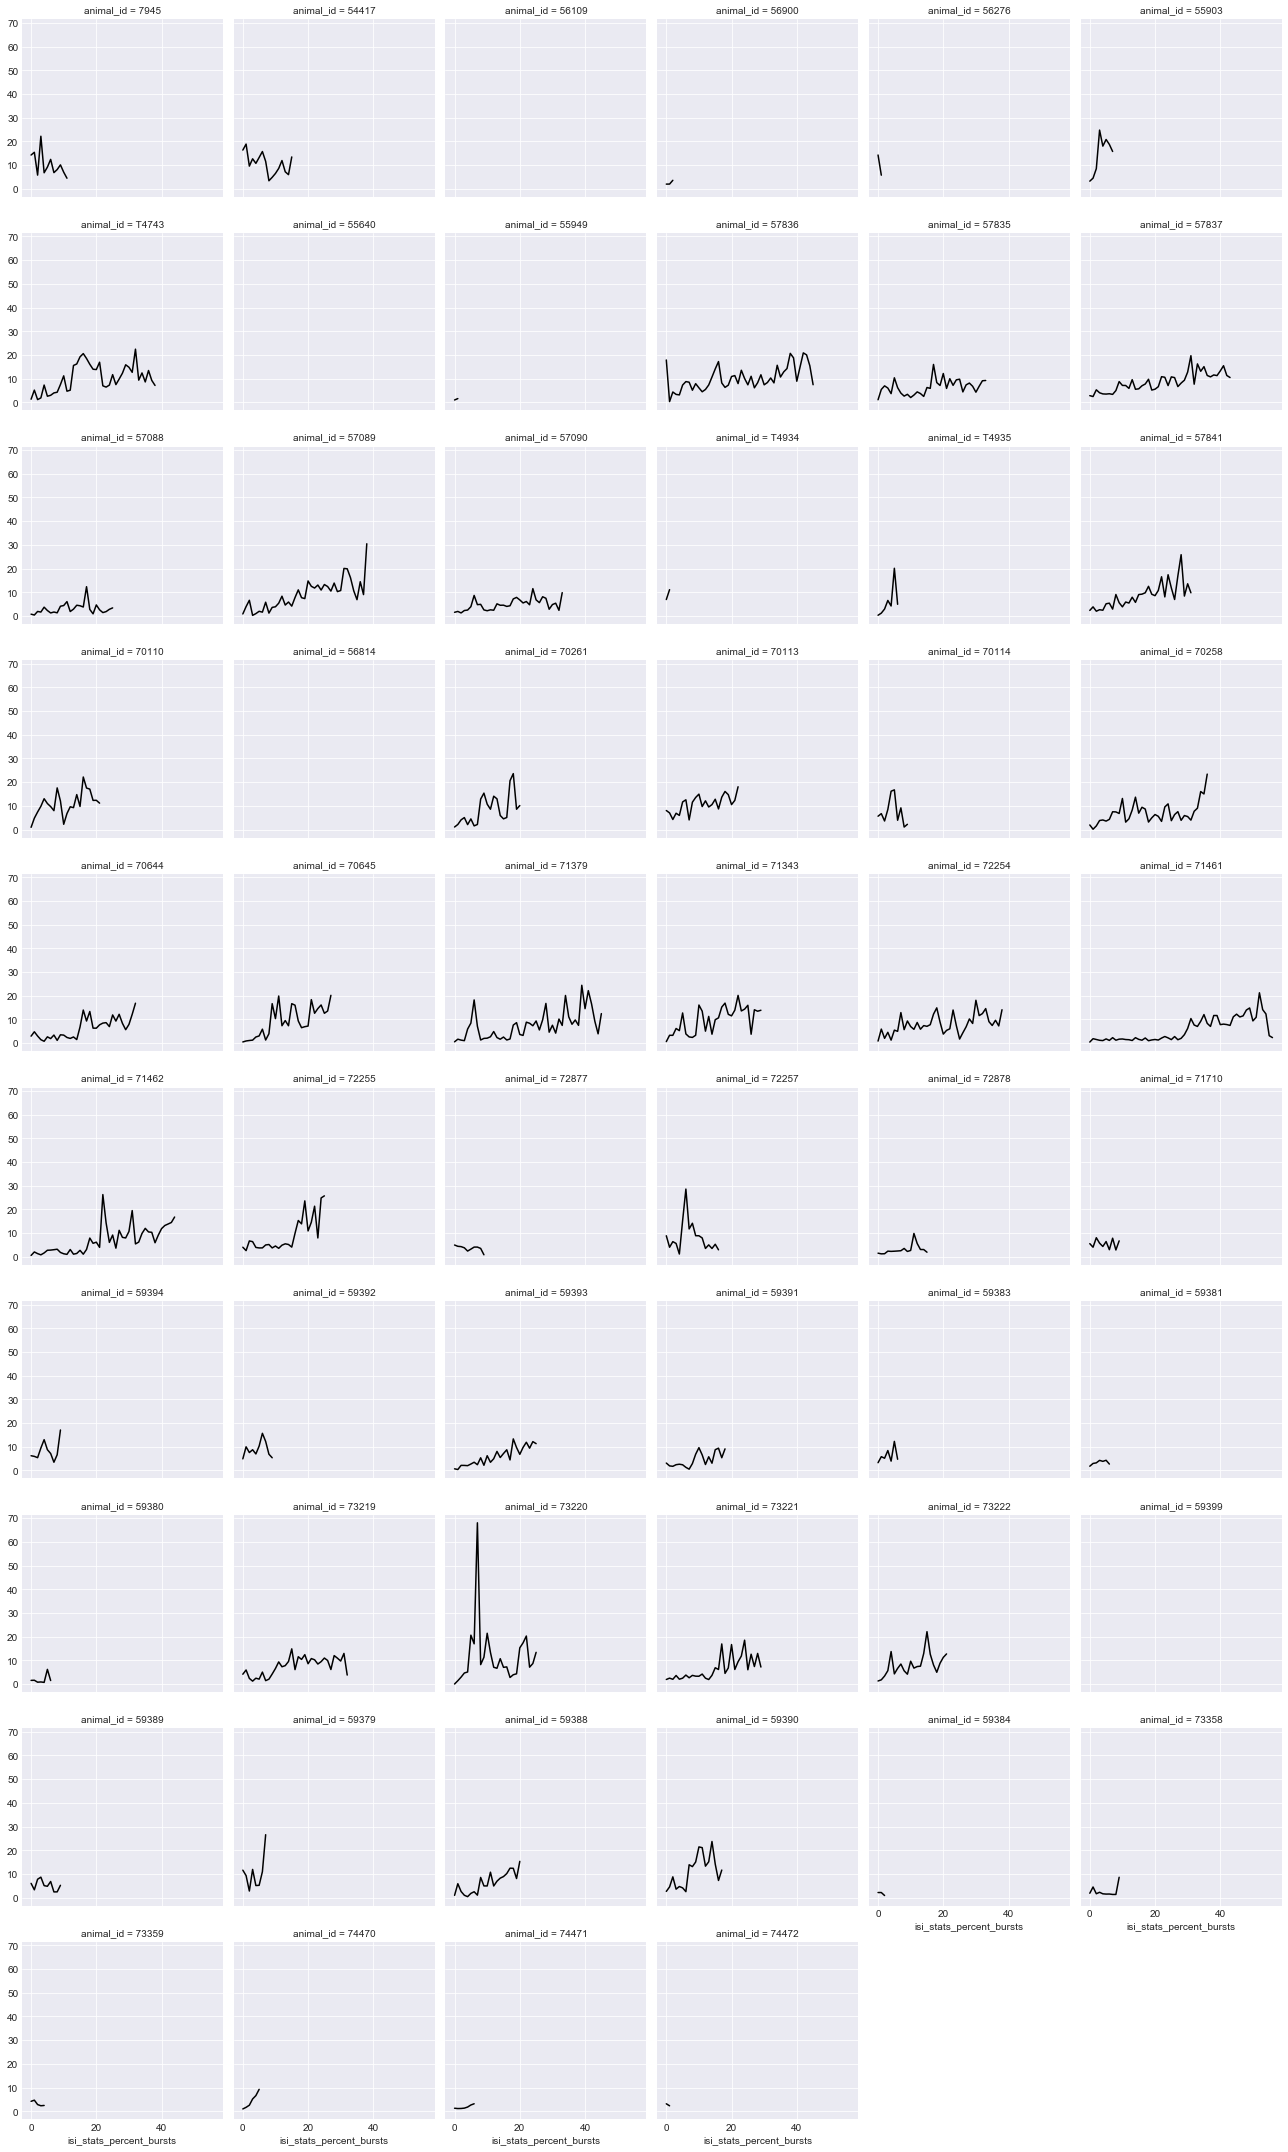

In [42]:
g = sns.FacetGrid(sorted, col="animal_id",col_wrap=6)
g.map(plt.plot, "isi_stats_percent_bursts",color='k')

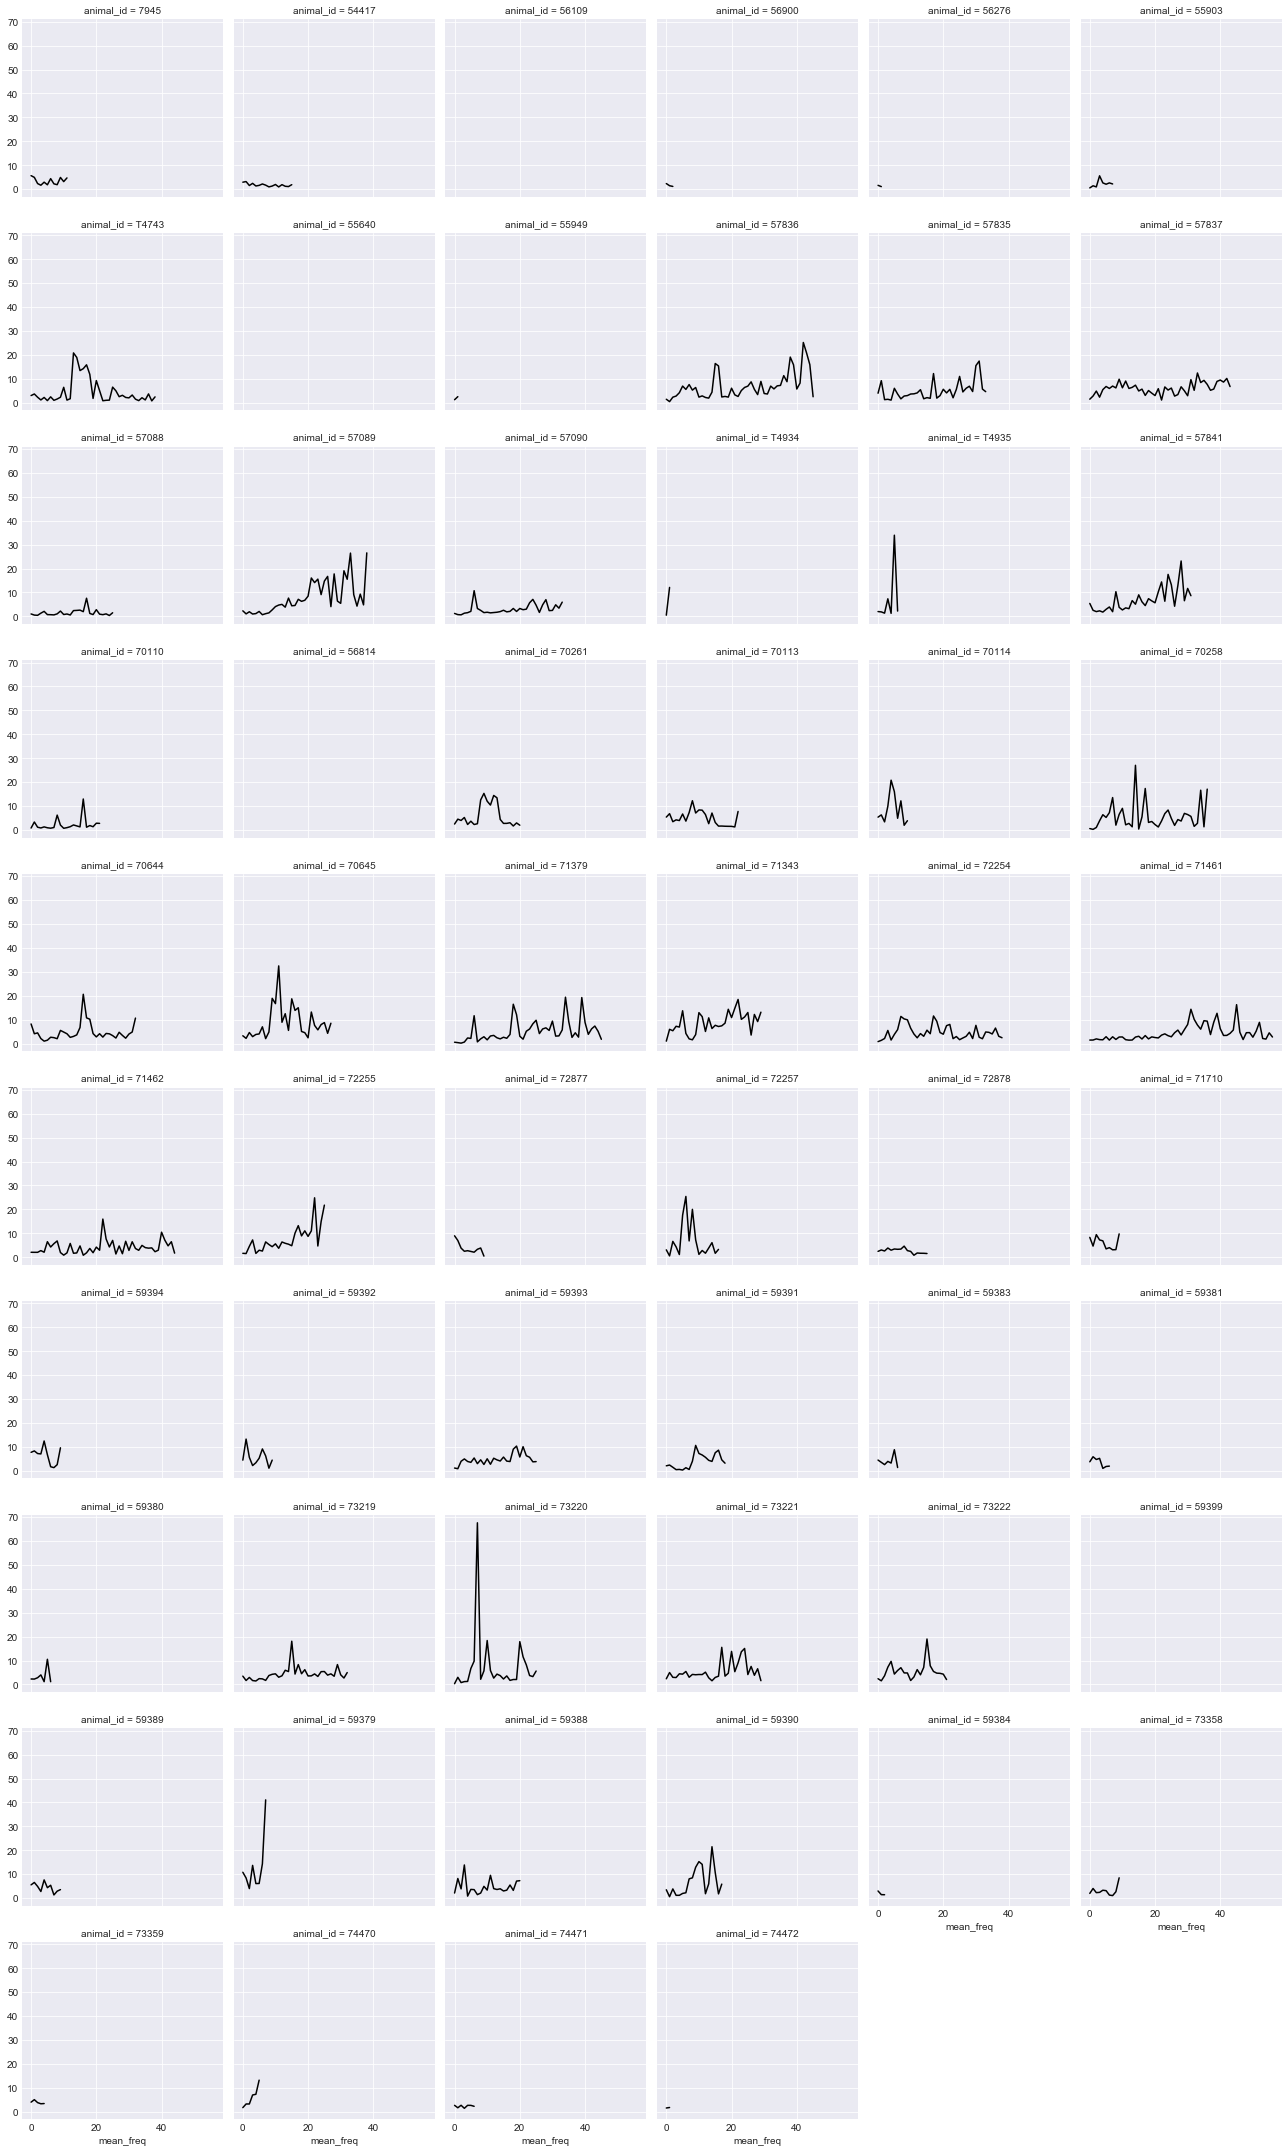

In [43]:
g = sns.FacetGrid(sorted, col="animal_id",col_wrap=6)
g.map(plt.plot, "mean_freq",color='k')

In [44]:
#g = sns.FacetGrid(sorted, col="animal_id",col_wrap=6)
#g.map(plt.plot, "theta_freq",color='k')

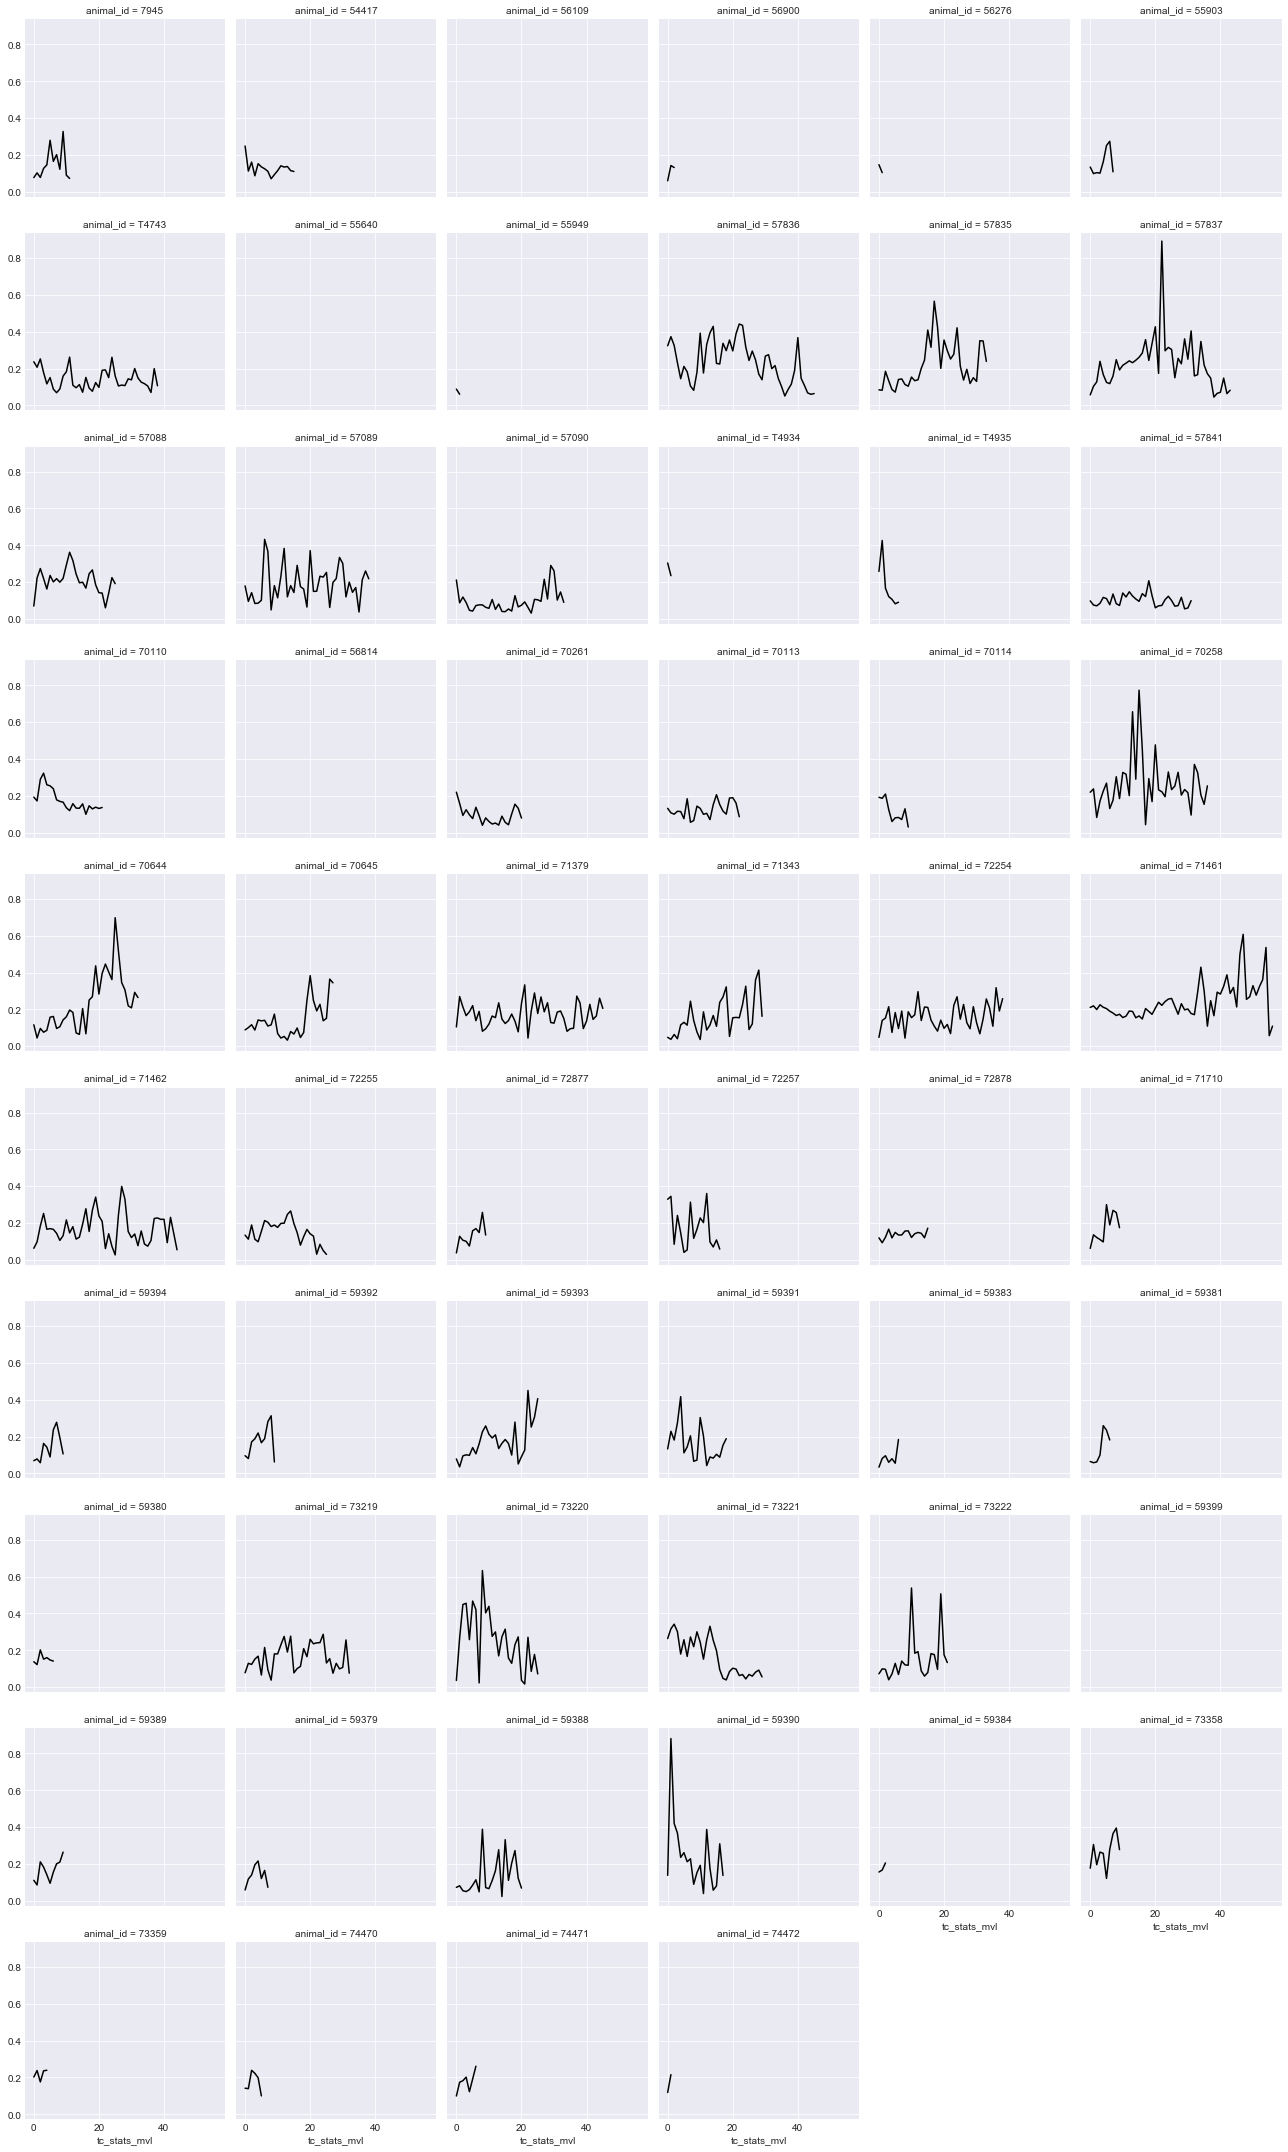

In [45]:
g = sns.FacetGrid(sorted, col="animal_id",col_wrap=6)
g.map(plt.plot, "tc_stats_mvl",color='k')

In [ ]:
exc = base_dataframe[(base_dataframe.salt_p<.05) & (base_dataframe.salt_i>.1)]

In [ ]:
psql = psql_neuroballs(exc)

In [ ]:
psql.retrieve_data()

In [53]:
exc = psql.data()

In [57]:
exc.sort_values(by="salt_i",ascending=False,inplace=True)


Generating plot...


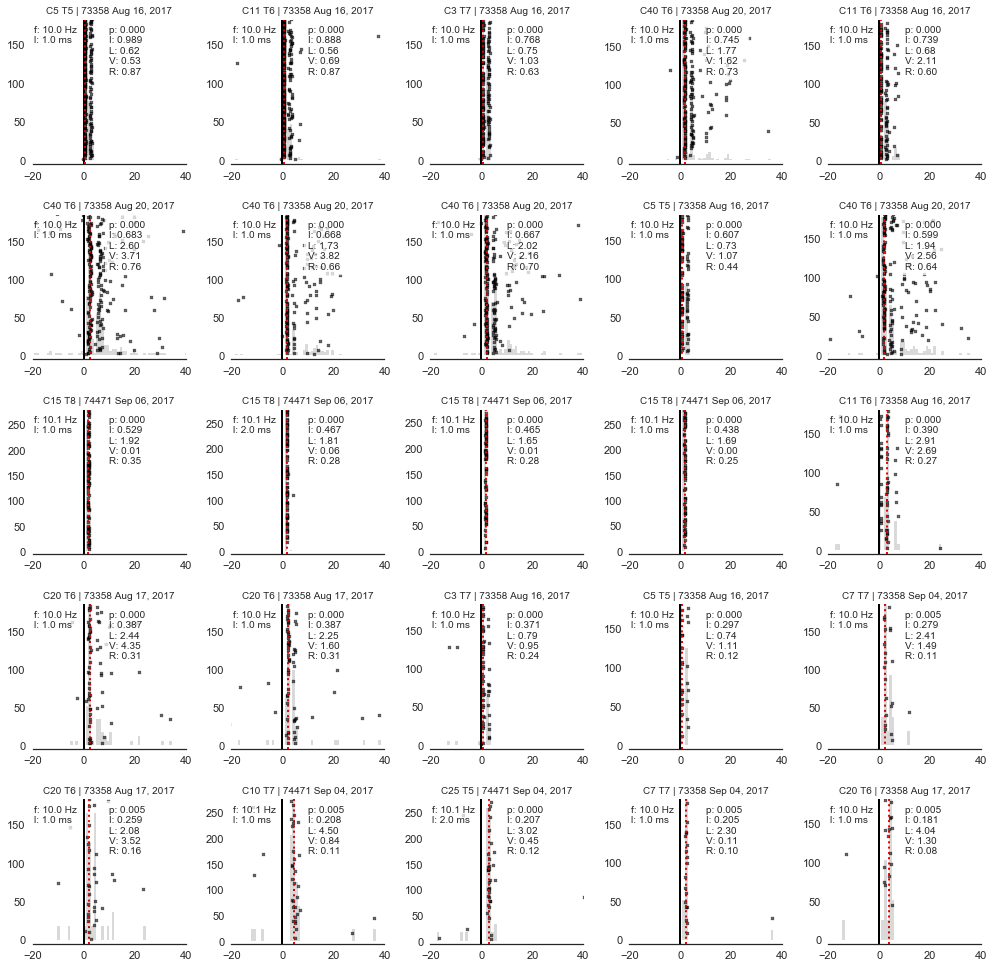

In [58]:
create_spike_plots_stimulus(exc,25,0,True)

In [63]:
psql = psql_neuroballs(exc)
psql.retrieve_data()

71 animals across 5 experimenters found!
Total # of 6982 sessions (unique clusters: 12879)
Length of input dataframe: 38


Retrieving data ... Dataframe not empty


Success. NaNs: 6


Success. NaNs: 19


Success. NaNs: 19


Success. NaNs: 19


Success. NaNs: 19



In [64]:
exc = psql.data()

In [65]:
exc

,analysis_window,angular_stability_bnt,animal_id,autocorr_bnt,bin_edges_1ms,bin_size,binnumber_1ms,bins_angle_center,bins_angle_center_bnt,bins_angle_center_phase,...,tc_stats_mvl_bnt,tc_stats_peakdirection_bnt,tc_stats_var,tetrode_no,theta_mean_phase_bnt,theta_range_max,theta_range_min,theta_strength_bnt,xedges,yedges
0,200,NaN,73358,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[0.0, 48.0, 96.0, 144.0, 192.0, 240.0, 288.0, ...",NaN,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",NaN,"[0.0, 0.0523598775598, 0.10471975512, 0.157079...",NaN,...,0.464671,283.5,NaN,5,"[-0.522899325287, -0.524592388147, -0.51612576...",NaN,NaN,"[0.207312256071, 0.205975896987, 0.20674859239...",NaN,NaN
1,200,0.09407,73358,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[0.0, 48.0, 96.0, 144.0, 192.0, 240.0, 288.0, ...",NaN,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",NaN,"[0.0, 0.0523598775598, 0.10471975512, 0.157079...",NaN,...,0.171664,148.5,NaN,6,"[1.61569620588, 1.64016130303, 1.65284459321, ...",NaN,NaN,"[0.023261914674, 0.0234374296125, 0.0228346339...",NaN,NaN
2,200,NaN,73358,NaN,"[0.0, 48.0, 96.0, 144.0, 192.0, 240.0, 288.0, ...",NaN,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",NaN,NaN,NaN,...,NaN,NaN,NaN,7,NaN,NaN,NaN,NaN,NaN,NaN
3,200,0.0673291,73358,"[[0.0, 0.0, 0.0, 0.0, -0.133557782683, 0.28718...","[0.0, 48.0, 96.0, 144.0, 192.0, 240.0, 288.0, ...",2,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[0.0174532925199, 0.0523598775598, 0.087266462...","[0.0, 0.0523598775598, 0.10471975512, 0.157079...","[0.0261799387799, 0.0785398163397, 0.130899693...",...,0.366168,250.5,0.629513,6,"[1.01879121105, 1.01548727191, 1.01829144744, ...",15,4,"[0.174986292852, 0.175123490452, 0.17566668462...","[185.477074654, 191.664105565, 197.851136475, ...","[2.00911554671, 11.899191798, 21.7892680493, 3..."
4,200,0.09407,73358,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[0.0, 48.0, 96.0, 144.0, 192.0, 240.0, 288.0, ...",NaN,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",NaN,"[0.0, 0.0523598775598, 0.10471975512, 0.157079...",NaN,...,0.171664,148.5,NaN,6,"[1.61569620588, 1.64016130303, 1.65284459321, ...",NaN,NaN,"[0.023261914674, 0.0234374296125, 0.0228346339...",NaN,NaN
5,200,0.0673291,73358,"[[0.0, 0.0, 0.0, 0.0, -0.133557782683, 0.28718...","[0.0, 48.0, 96.0, 144.0, 192.0, 240.0, 288.0, ...",2,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[0.0174532925199, 0.0523598775598, 0.087266462...","[0.0, 0.0523598775598, 0.10471975512, 0.157079...","[0.0261799387799, 0.0785398163397, 0.130899693...",...,0.366168,250.5,0.629513,6,"[1.01879121105, 1.01548727191, 1.01829144744, ...",15,4,"[0.174986292852, 0.175123490452, 0.17566668462...","[185.477074654, 191.664105565, 197.851136475, ...","[2.00911554671, 11.899191798, 21.7892680493, 3..."
6,200,0.0673291,73358,"[[0.0, 0.0, 0.0, 0.0, -0.133557782683, 0.28718...","[0.0, 48.0, 96.0, 144.0, 192.0, 240.0, 288.0, ...",2,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[0.0174532925199, 0.0523598775598, 0.087266462...","[0.0, 0.0523598775598, 0.10471975512, 0.157079...","[0.0261799387799, 0.0785398163397, 0.130899693...",...,0.366168,250.5,0.629513,6,"[1.01879121105, 1.01548727191, 1.01829144744, ...",15,4,"[0.174986292852, 0.175123490452, 0.17566668462...","[185.477074654, 191.664105565, 197.851136475, ...","[2.00911554671, 11.899191798, 21.7892680493, 3..."
7,200,0.0673291,73358,"[[0.0, 0.0, 0.0, 0.0, -0.133557782683, 0.28718...","[0.0, 48.0, 96.0, 144.0, 192.0, 240.0, 288.0, ...",2,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[0.0174532925199, 0.0523598775598, 0.087266462...","[0.0, 0.0523598775598, 0.10471975512, 0.157079...","[0.0261799387799, 0.0785398163397, 0.130899693...",...,0.366168,250.5,0.629513,6,"[1.01879121105, 1.01548727191, 1.01829144744, ...",15,4,"[0.174986292852, 0.175123490452, 0.17566668462...","[185.477074654, 191.664105565, 197.851136475, ...","[2.00911554671, 11.899191798, 21.7892680493, 3..."
8,200,NaN,73358,"[[0.0, 0.0, 0

### Here are some useful summary plot functions


Generating plot ...


C:\Users\horsto\AppData\Local\Continuum\Miniconda2\envs\analysis\lib\site-packages\matplotlib\projections\polar.py:65: RuntimeWarning: invalid value encountered in less
  mask = r < 0


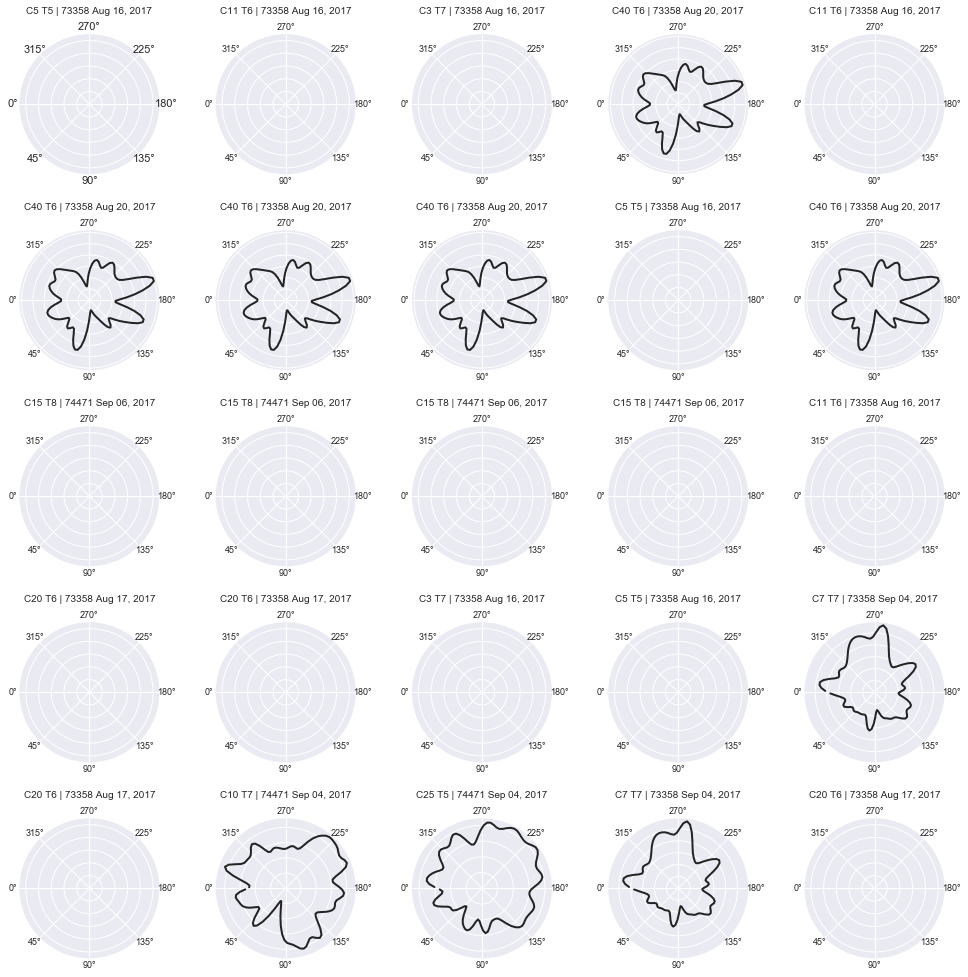

In [66]:
draw_tuning_curves(exc,['bins_angle_center_phase','hist_angle_smooth_phase'],25,0,'W')


Generating plot ...


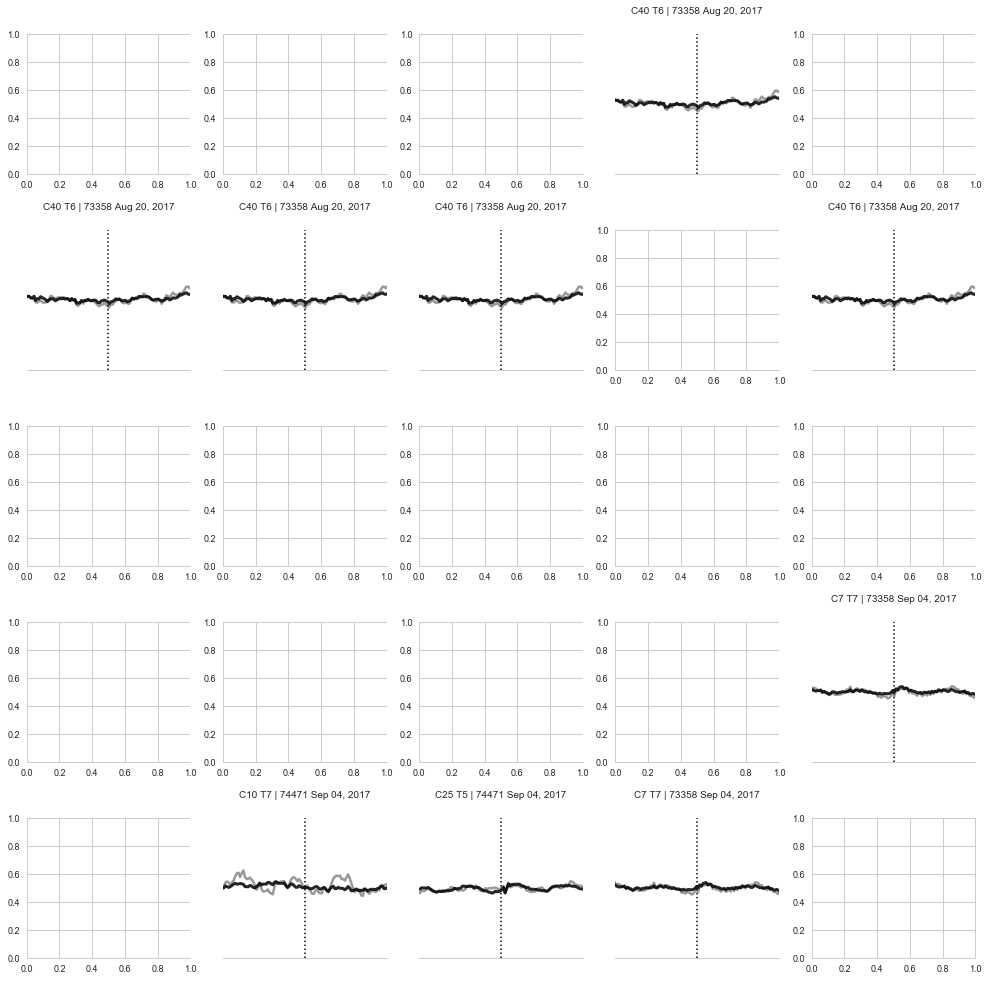

In [67]:
draw_spiket_LFP(exc,25,0,sample_rate=250.)


Generating plot ...


C:\Users\horsto\AppData\Local\Continuum\Miniconda2\envs\analysis\lib\site-packages\matplotlib\colors.py:823: UserWarning: Warning: converting a masked element to nan.
  dtype = np.min_scalar_type(value)
C:\Users\horsto\AppData\Local\Continuum\Miniconda2\envs\analysis\lib\site-packages\numpy\ma\core.py:2809: UserWarning: Warning: converting a masked element to nan.
  order=order, subok=True, ndmin=ndmin)
C:\Users\horsto\AppData\Local\Continuum\Miniconda2\envs\analysis\lib\site-packages\matplotlib\colors.py:861: RuntimeWarning: divide by zero encountered in true_divide
  resdat /= (vmax - vmin)


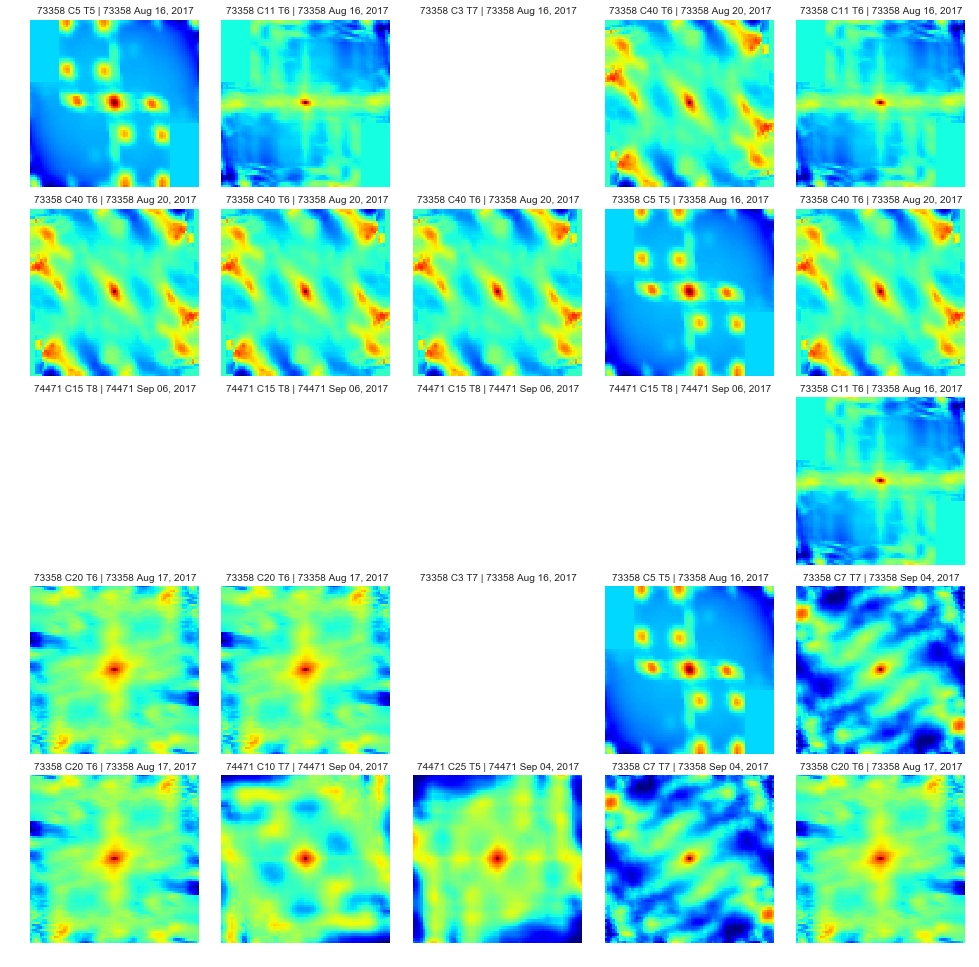

In [68]:
draw_ratemaps(exc,'autocorr_bnt',25,0)

In [10]:
#draw_auto_corrs(base_dataframe,25,0)

#### Example: Sort for gridscore and plot


Generating plot ...


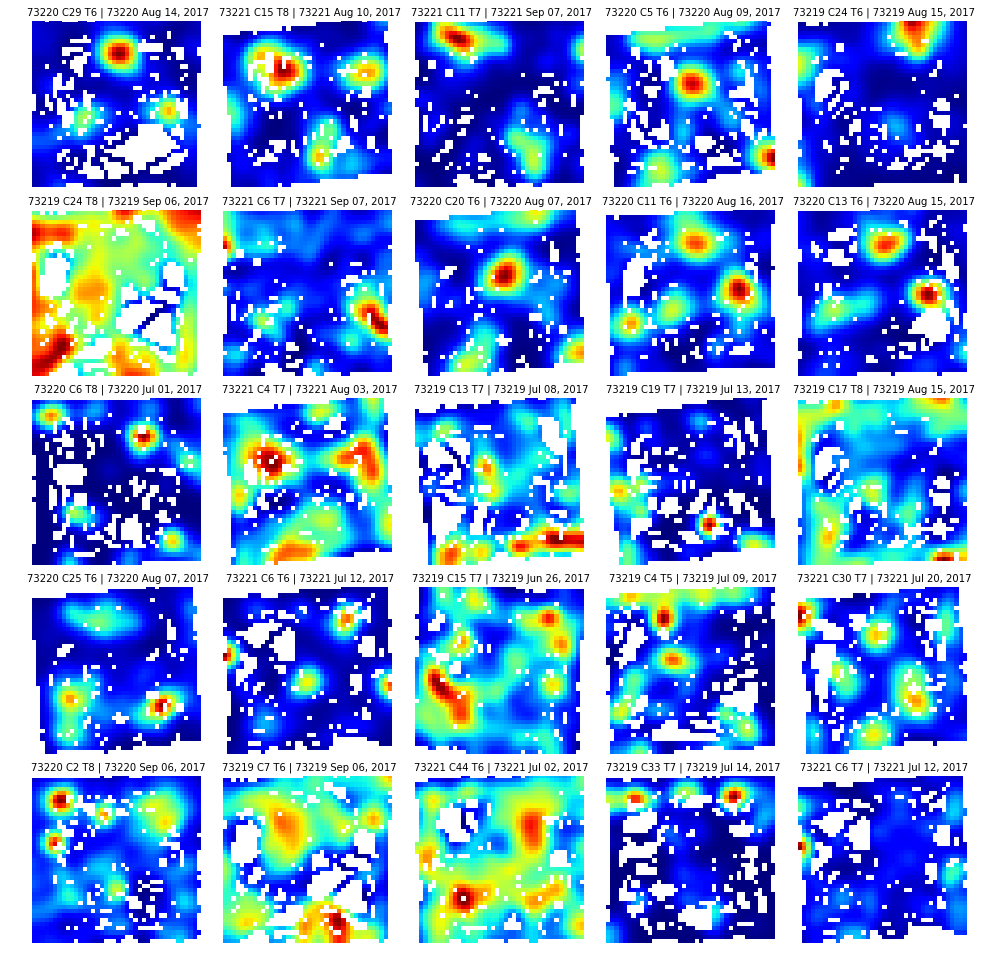

In [21]:
# ... after sorting, plot:
draw_ratemaps(base_dataframe,'masked_ratemap_bnt',25,0) # 25 plots, from start ('0') of dataframe


Generating plot ...


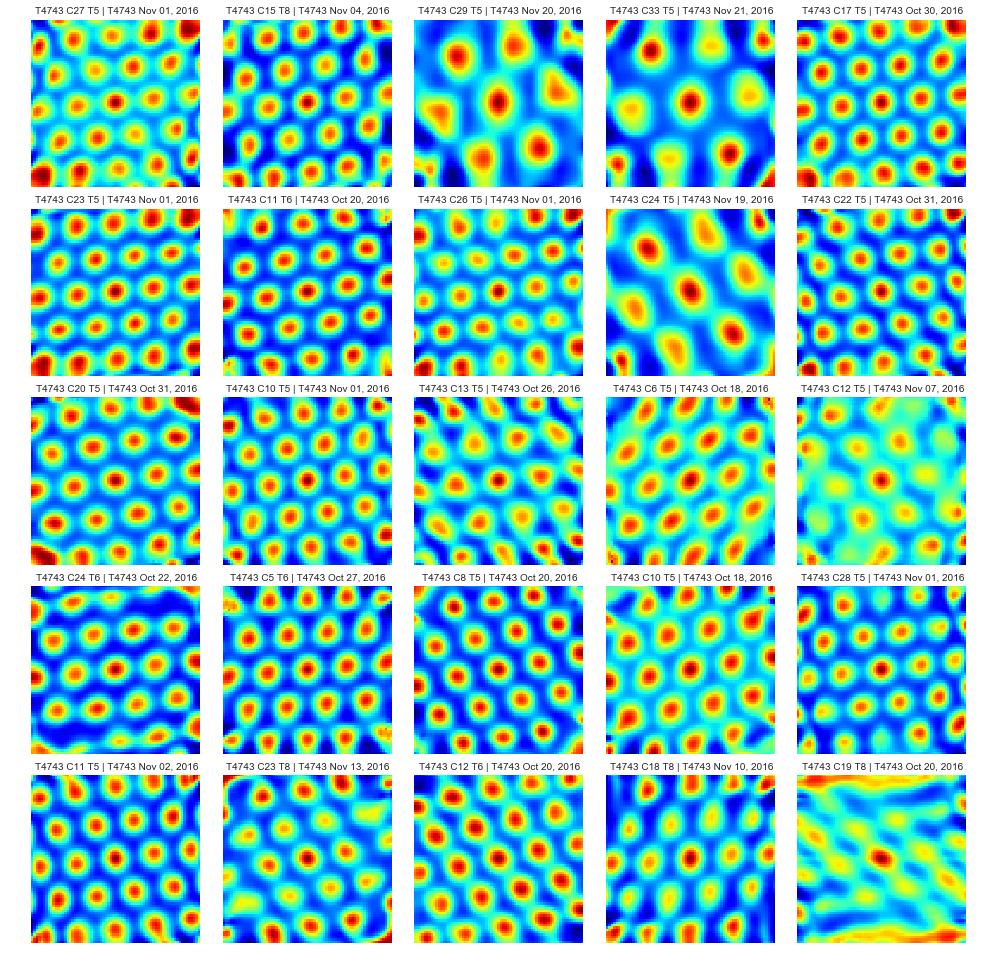

In [10]:
# ... and here are the corresponding auto correlations
draw_ratemaps(base_dataframe,'autocorr_bnt',25,0)

In [ ]:
# Happy data mining! 